# Kaggle : Tabular Plaground Series June 2022
https://www.kaggle.com/competitions/tabular-playground-series-jun-2022   
For this challenge, you are given (simulated) manufacturing control data that contains missing values due to electronic errors. Your task is to predict the values of all missing data in this dataset.

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv', index_col='row_id')
submission =  pd.read_csv('sample_submission.csv', index_col='row-col')

In [ ]:
data

,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,F_1_9,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
row_id,,,,,,,,,,,,,,,,,,,,,
0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,-0.500665,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,-0.363425,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,0.595777,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,-2.217847,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,-1.143500,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,-0.823740,0.285673,0.343307,-0.436747,1.700549,-1.069432,0.819698,-0.168457,-0.429074,0.844075,...,1.799592,-0.301352,5.339675,-0.991529,1.279494,-0.841051,-2.276500,1.762961,5.324553,-0.228733
999996,-0.769106,-0.387363,-1.227469,0.601183,0.351161,0.219475,-0.530277,0.853452,0.608646,1.648023,...,1.909697,-1.299360,-0.071713,-0.162173,0.072501,-0.614687,-1.265524,0.190385,-0.344112,-0.346807
999997,0.147534,-0.715276,-0.465049,-1.988941,-1.594535,-1.044882,3.159455,-0.634108,0.890382,-1.212444,...,2.891854,3.105002,-3.470520,NaN,0.096988,0.569255,3.609790,-0.584108,-1.492096,-0.997502


## EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 80 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   F_1_0   981603 non-null   float64
 1   F_1_1   981784 non-null   float64
 2   F_1_2   981992 non-null   float64
 3   F_1_3   981750 non-null   float64
 4   F_1_4   981678 non-null   float64
 5   F_1_5   981911 non-null   float64
 6   F_1_6   981867 non-null   float64
 7   F_1_7   981872 non-null   float64
 8   F_1_8   981838 non-null   float64
 9   F_1_9   981751 non-null   float64
 10  F_1_10  982039 non-null   float64
 11  F_1_11  981830 non-null   float64
 12  F_1_12  981797 non-null   float64
 13  F_1_13  981602 non-null   float64
 14  F_1_14  981961 non-null   float64
 15  F_2_0   1000000 non-null  int64  
 16  F_2_1   1000000 non-null  int64  
 17  F_2_2   1000000 non-null  int64  
 18  F_2_3   1000000 non-null  int64  
 19  F_2_4   1000000 non-null  int64  
 20  F_2_5   1000000 non-null 

In [ ]:
data.isnull().sum()

F_1_0     18397
F_1_1     18216
F_1_2     18008
F_1_3     18250
F_1_4     18322
          ...  
F_4_10    18225
F_4_11    18119
F_4_12    18306
F_4_13    17995
F_4_14    18267
Length: 80, dtype: int64

In [ ]:
missing = pd.DataFrame(columns=['% Missing values'], data=data.isnull().sum()/len(data))
missing

,% Missing values
F_1_0,0.018397
F_1_1,0.018216
F_1_2,0.018008
F_1_3,0.018250
F_1_4,0.018322
...,...
F_4_10,0.018225
F_4_11,0.018119
F_4_12,0.018306
F_4_13,0.017995


In [ ]:
features = list(data.columns)
features = features[1:len(features)]

F1_features = [feat for feat in features if feat[:3] == "F_1"]
F2_features = [feat for feat in features if feat[:3] == "F_2"]
F3_features = [feat for feat in features if feat[:3] == "F_3"]
F4_features = [feat for feat in features if feat[:3] == "F_4"]

df_F123 = data.drop(F4_features, axis=1)
df_F4 = data[F4_features]

### F2 feature have no missing value

In [ ]:
data[F2_features].isnull().sum()

F_2_0     0
F_2_1     0
F_2_2     0
F_2_3     0
F_2_4     0
F_2_5     0
F_2_6     0
F_2_7     0
F_2_8     0
F_2_9     0
F_2_10    0
F_2_11    0
F_2_12    0
F_2_13    0
F_2_14    0
F_2_15    0
F_2_16    0
F_2_17    0
F_2_18    0
F_2_19    0
F_2_20    0
F_2_21    0
F_2_22    0
F_2_23    0
F_2_24    0
dtype: int64

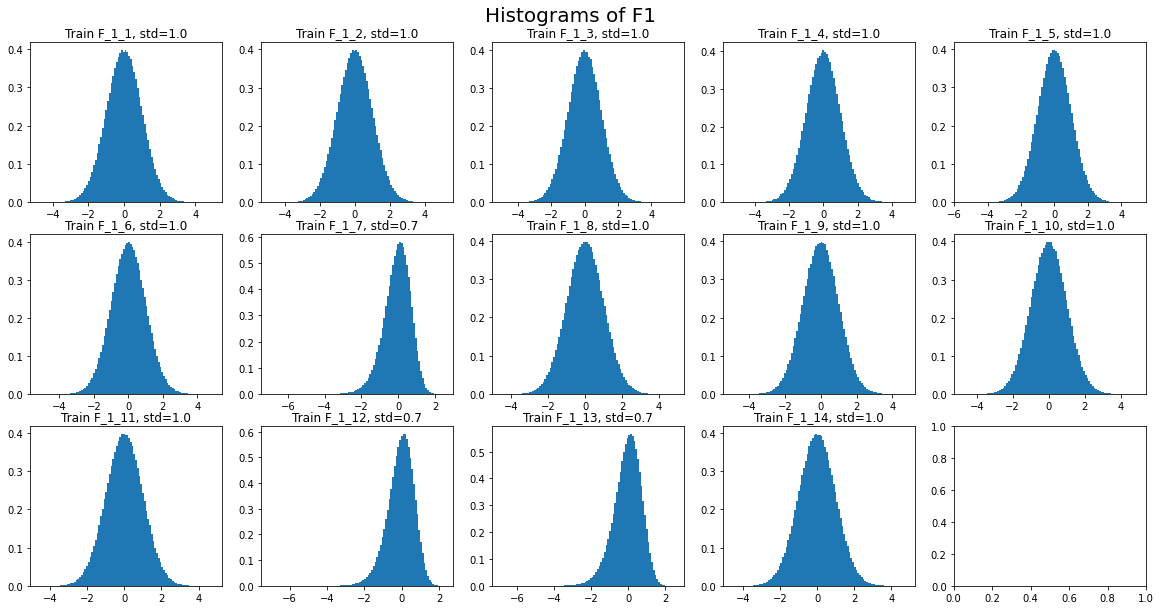

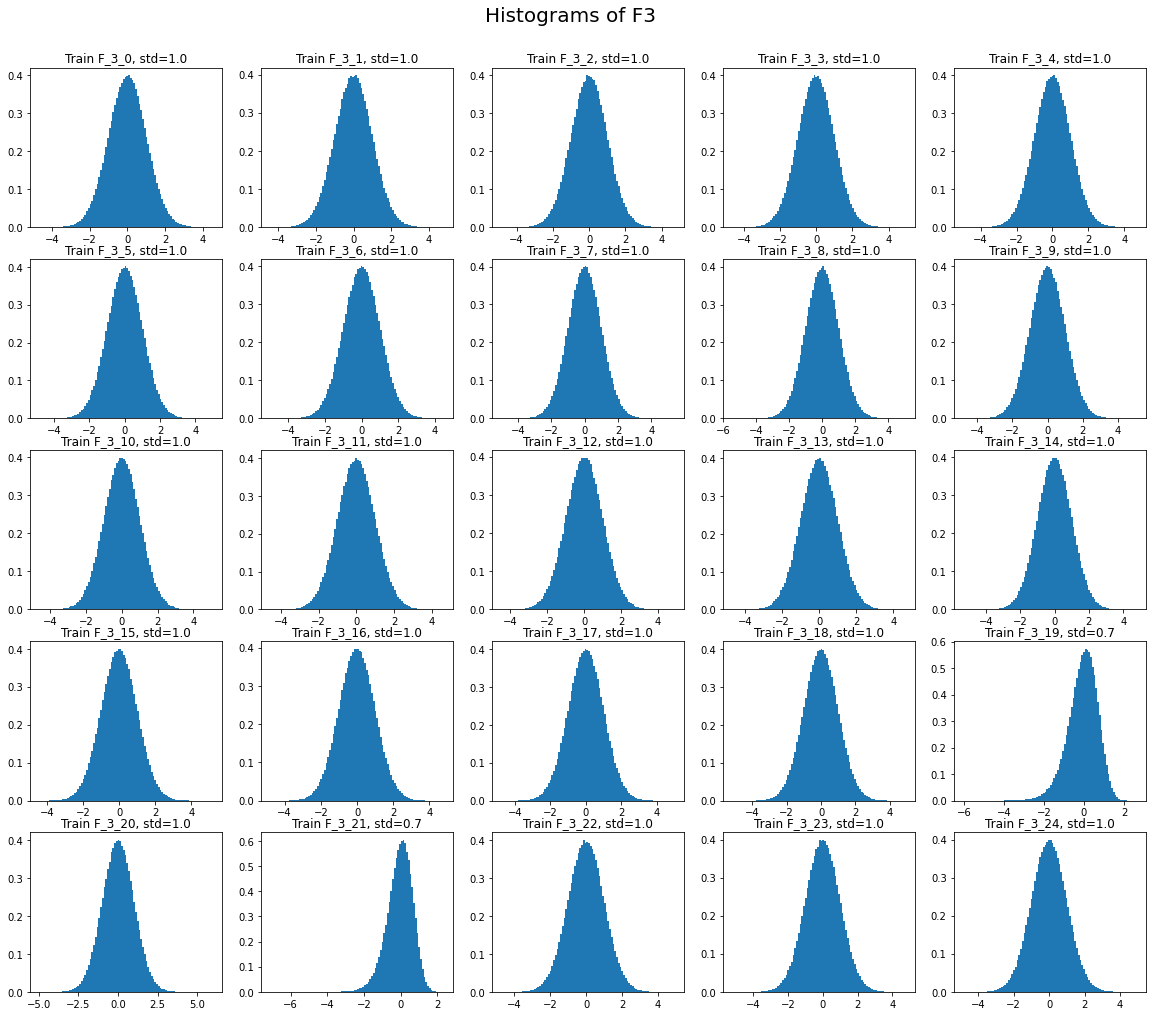

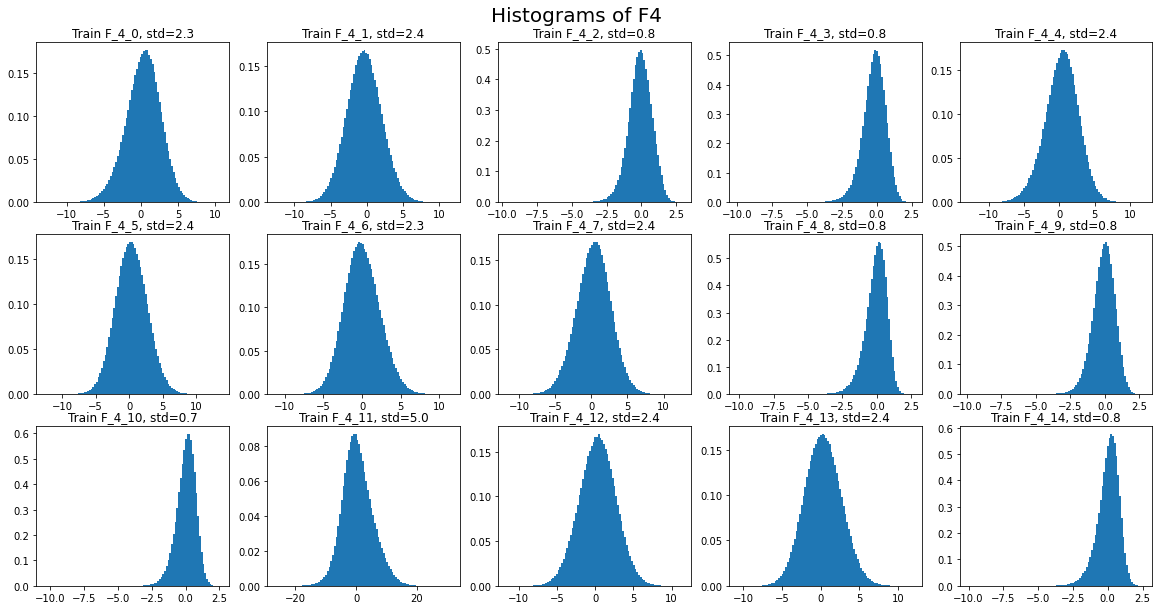

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Training histograms
fig, axs = plt.subplots(3, 5, figsize=(20, 10)) #畫5(寬)*3(長)個圖，尺寸為20cm*10com
for f, ax in zip(F1_features, axs.ravel()):
    ax.hist(data[f], density=True, bins=100) #Histograms
    ax.set_title(f'Train {f}, std={data[f].std():.1f}') 
plt.suptitle('Histograms of F1', y=0.93, fontsize=20)
plt.show()

# Training histograms
fig, axs = plt.subplots(5, 5, figsize=(20, 17))
for f, ax in zip(F3_features, axs.ravel()):
    ax.hist(data[f], density=True, bins=100)
    ax.set_title(f'Train {f}, std={data[f].std():.1f}')
plt.suptitle('Histograms of F3', y=0.93, fontsize=20)
plt.show()

# Training histograms
fig, axs = plt.subplots(3, 5, figsize=(20, 10))
for f, ax in zip(F4_features, axs.ravel()):
    ax.hist(data[f], density=True, bins=100)
    ax.set_title(f'Train {f}, std={data[f].std():.1f}')
plt.suptitle('Histograms of F4', y=0.93, fontsize=20)
plt.show()

### Check the correlation between all features

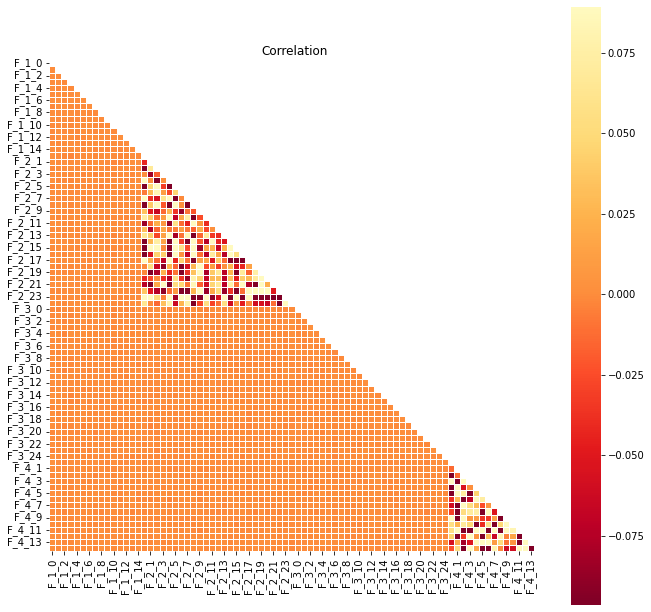

In [ ]:
plt.figure(figsize=(11,11))
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, robust=True, center=0,square=True, linewidths=.6,cmap='YlOrRd_r')
plt.title('Correlation')
plt.show()

The F_4_X features are only correlated with other F_4_X features.  
The integer F_2_X features are only correlated with other F_2_X features.  
F_1_X and F_3_X features are not correlated with any other feature.  

For column F1 and F3,Using mean imputation

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy='mean') 
impute = imp.fit_transform(df_F123)
df_F123 = pd.DataFrame(impute, columns=df_F123.columns)   

In [ ]:
def NA_col(row):
    na_columns = []
    for i in row.items():
        if np.isnan(i[1]):
            na_columns.append(i[0])
    return ','.join(na_columns)

df_F4['nan_cols'] = df_F4.apply(NA_col,axis=1)
df_F4

C:\Users\assd4\AppData\Local\Temp\ipykernel_1188\361807666.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F4['nan_cols'] = df_F4.apply(qqq,axis=1)


,F_4_0,F_4_1,F_4_2,F_4_3,F_4_4,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14,nan_cols
row_id,,,,,,,,,,,,,,,,
0,5.547214,1.066871,-0.134313,-0.101040,-0.660871,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055,
1,-1.707374,-1.188114,-0.562419,-1.462988,1.290672,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775,
2,1.914908,3.877128,NaN,0.358635,0.443973,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576,F_4_2
3,-2.638262,0.546676,0.865400,-0.857077,2.667105,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152,
4,-0.230342,-0.459019,1.128705,-0.748683,NaN,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943,F_4_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1.148096,-5.126425,0.746223,-0.195402,2.615170,1.799592,-0.301352,5.339675,-0.991529,1.279494,-0.841051,-2.276500,1.762961,5.324553,-0.228733,
999996,-4.990146,-1.636969,0.862797,0.331960,2.386669,1.909697,-1.299360,-0.071713,-0.162173,0.072501,-0.614687,-1.265524,0.190385,-0.344112,-0.346807,
999997,1.067439,0.293753,-0.866815,-0.291116,1.208282,2.891854,3.105002,-3.470520,NaN,0.096988,0.569255,3.609790,-0.584108,-1.492096,-0.997502,F_4_8


In [ ]:
#完全無遺失值的資料
train_f4_df = df_F4[df_F4['nan_cols'] == '']
train_f4_df = train_f4_df.drop(['nan_cols'],axis=1)
train_f4_df

,F_4_0,F_4_1,F_4_2,F_4_3,F_4_4,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
row_id,,,,,,,,,,,,,,,
0,5.547214,1.066871,-0.134313,-0.101040,-0.660871,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,-1.707374,-1.188114,-0.562419,-1.462988,1.290672,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
3,-2.638262,0.546676,0.865400,-0.857077,2.667105,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
5,0.851356,-3.664918,-0.508008,0.887303,0.976945,-0.359761,1.740050,1.927704,-0.082221,-0.548425,-1.186292,-2.559834,1.041985,1.934286,0.478067
6,6.320272,-3.384869,-1.237707,-0.229380,0.228161,-2.149355,4.226621,-1.136903,0.171289,0.703419,-0.779643,4.721938,1.835678,-6.408681,0.538917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,0.862858,0.934280,-1.435707,-0.937750,2.457627,0.313054,4.192217,-1.922323,-0.949024,-0.626634,1.089418,11.348415,-0.030478,-2.844943,0.320233
999995,1.148096,-5.126425,0.746223,-0.195402,2.615170,1.799592,-0.301352,5.339675,-0.991529,1.279494,-0.841051,-2.276500,1.762961,5.324553,-0.228733
999996,-4.990146,-1.636969,0.862797,0.331960,2.386669,1.909697,-1.299360,-0.071713,-0.162173,0.072501,-0.614687,-1.265524,0.190385,-0.344112,-0.346807


In [ ]:
#有遺失值的資料
test_f4_df = df_F4[df_F4['nan_cols'] != '']
test_f4_df

,F_4_0,F_4_1,F_4_2,F_4_3,F_4_4,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14,nan_cols
row_id,,,,,,,,,,,,,,,,
2,1.914908,3.877128,NaN,0.358635,0.443973,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576,F_4_2
4,-0.230342,-0.459019,1.128705,-0.748683,NaN,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943,F_4_4
7,2.746425,1.292621,0.065437,NaN,1.046909,3.150719,1.134666,3.063516,0.046446,0.790186,0.502879,11.601874,3.131883,-2.842624,NaN,"F_4_3,F_4_14"
10,1.783321,-2.786770,0.262952,-0.899654,-1.273353,-1.950920,2.514465,0.133249,-0.287813,0.114724,0.559715,-4.531144,NaN,3.478992,0.524271,F_4_12
12,1.781308,-0.861289,0.078844,0.027668,3.424435,-2.315479,1.522740,-1.669253,0.705616,0.633991,-0.138011,-1.766531,4.201617,-0.356847,NaN,F_4_14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999987,3.541019,0.671639,0.618628,-1.348153,1.370605,3.573961,-2.705472,3.057571,0.270369,NaN,-0.676451,4.369751,0.373894,-3.454489,-0.903024,F_4_9
999990,-0.103016,0.237665,-0.272894,-0.873102,4.176781,0.566717,3.220632,-0.810384,0.097822,0.564400,-0.101743,1.259051,NaN,1.126617,-0.618042,F_4_12
999993,1.684267,-3.623579,NaN,-0.820868,2.355548,0.132637,0.234178,1.123986,-0.816773,0.068622,1.144882,3.492984,1.023172,3.377847,0.419816,F_4_2


In [ ]:
#每個欄位的遺失值數量
combs = test_f4_df['nan_cols'].value_counts().reset_index()
combs

,index,nan_cols
0,F_4_2,14248
1,F_4_6,14201
2,F_4_10,14198
3,F_4_0,14175
4,F_4_9,14166
...,...,...
698,"F_4_1,F_4_3,F_4_6,F_4_7",1
699,"F_4_1,F_4_10,F_4_13",1
700,"F_4_2,F_4_8,F_4_9,F_4_12",1
701,"F_4_3,F_4_6,F_4_13,F_4_14",1


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout,InputLayer
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


def fit_NN_model(comb):
    global train_f4_df,test_f4_df #宣告全域變數
    test_df = test_f4_df[test_f4_df['nan_cols'] == comb] #有相同欄位遺失值的資料,例如遺失值都是在F_4_2的資料
    test_df = test_df.drop(['nan_cols'],axis=1) #移除遺失值的欄位

    cols = comb.split(',') #分割具有多重欄位遺失值的欄位，例如F_4_7,F_4_8,F_4_12,F_4_13 = ['F_4_7', 'F_4_8', 'F_4_12', 'F_4_13']
    train_x = train_f4_df.drop(cols,axis=1)  #移除遺失值的欄位，作為訓練資料的X
    test_df = test_df.drop(cols,axis=1) 

    train_y = train_f4_df.loc[:, cols] #取得遺失值欄位的資料，作為訓練的Y

    X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=1) #切分訓練與驗證資料

    scaler = StandardScaler() #資料標準化
    X_train_scaler = scaler.fit_transform(X_train)
    X_val_scaler = scaler.fit_transform(X_val)
    test_scaler = scaler.fit_transform(test_df)
    validation_data = (X_val_scaler, y_val)

    np.random.seed(42)
    tf.random.set_seed(42)

    model = Sequential()
    model.add(InputLayer(X_train.shape[1] ))
    model.add(Dense(128,activation='swish'))
    model.add(Dropout(0.001))
    model.add(Dense(64,activation='swish'))
    model.add(Dense(32,activation='swish'))
    model.add(Dense(8,activation='swish'))
    model.add(Dense(train_y.shape[1])) 

    model.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')
    history = model.fit(X_train_scaler, y_train, validation_data = validation_data, epochs=50, verbose = 0, batch_size=16384,shuffle=True)

    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]  

    pred = model.predict(test_scaler,batch_size=16384, verbose=0)
        
    df_pred = pd.DataFrame(data = pred, columns=cols)

    for i in cols: #預測值的欄位
        a = 0
        for j in test_df.index: #每個欄位預測值的Index
          df_F4[i][j] = df_pred[i][a] 
          a += 1
    return comb ,train_loss, val_loss

In [ ]:
import warnings
warnings.filterwarnings("ignore")
i = 0
total = len(combs)

for q in combs.itertuples():
    comb, loss, val_loss = fit_NN_model(q.index)
    i = i + 1
    print("%s/%s"%(str(i),str(total) ) ,comb,"TRAIN-MSE:", loss,"VAL-MSE:", val_loss)

1/703 F_4_2  TRAIN-MES:0.0004722842131741345  VAL-MSE: 0.000333455071086064 
2/703 F_4_6  TRAIN-MES:0.026551038026809692  VAL-MSE: 0.021771341562271118 
3/703 F_4_10  TRAIN-MES:0.0005770543939433992  VAL-MSE: 0.00017062106053344905 
4/703 F_4_0  TRAIN-MES:0.013329533860087395  VAL-MSE: 0.006699034478515387 
5/703 F_4_9  TRAIN-MES:0.002593419048935175  VAL-MSE: 0.0014764905208721757 
6/703 F_4_12  TRAIN-MES:0.0043267905712127686  VAL-MSE: 0.0005657511064782739 
7/703 F_4_14  TRAIN-MES:0.00034956817398779094  VAL-MSE: 5.04222116433084e-05 
8/703 F_4_1  TRAIN-MES:0.004588862881064415  VAL-MSE: 0.0018567393999546766 
9/703 F_4_5  TRAIN-MES:0.0016172166215255857  VAL-MSE: 0.0006547711091116071 
10/703 F_4_11  TRAIN-MES:0.0011431125458329916  VAL-MSE: 0.0002954941301140934 
11/703 F_4_7  TRAIN-MES:0.00665289955213666  VAL-MSE: 0.0037133602891117334 
12/703 F_4_8  TRAIN-MES:0.00025567703414708376  VAL-MSE: 0.00010042164649348706 
13/703 F_4_13  TRAIN-MES:0.0008431678870692849  VAL-MSE: 0.0002

In [ ]:
from tqdm import tqdm

df = pd.concat([df_F123, df_F4], axis = 1) #合併F_123與F_4
for i in tqdm(submission.index):
    row = int(i.split('-')[0]) #預測值在第幾個row
    col = i.split('-')[1] #預測值在第幾個colunm
    submission.loc[i, 'value'] = df.loc[row, col] 
submission.to_csv('submission_v4.csv')
submission

100%|██████████| 1000000/1000000 [00:41<00:00, 24183.70it/s]


,value
row-col,
0-F_1_14,-0.000905
0-F_3_23,0.000365
1-F_3_24,-0.000817
2-F_1_2,0.000551
2-F_4_2,0.381737
...,...
999993-F_4_2,-0.098584
999994-F_3_10,0.001706
999994-F_4_9,-0.078648


### Final rank

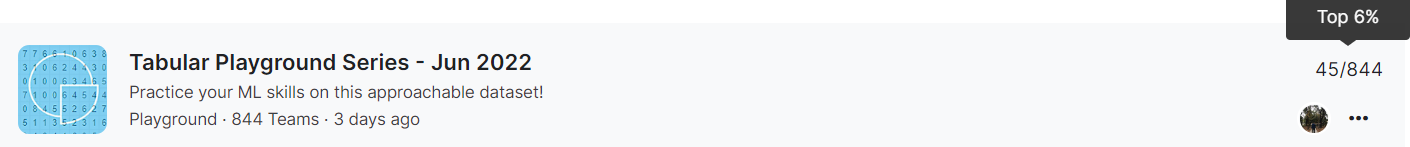

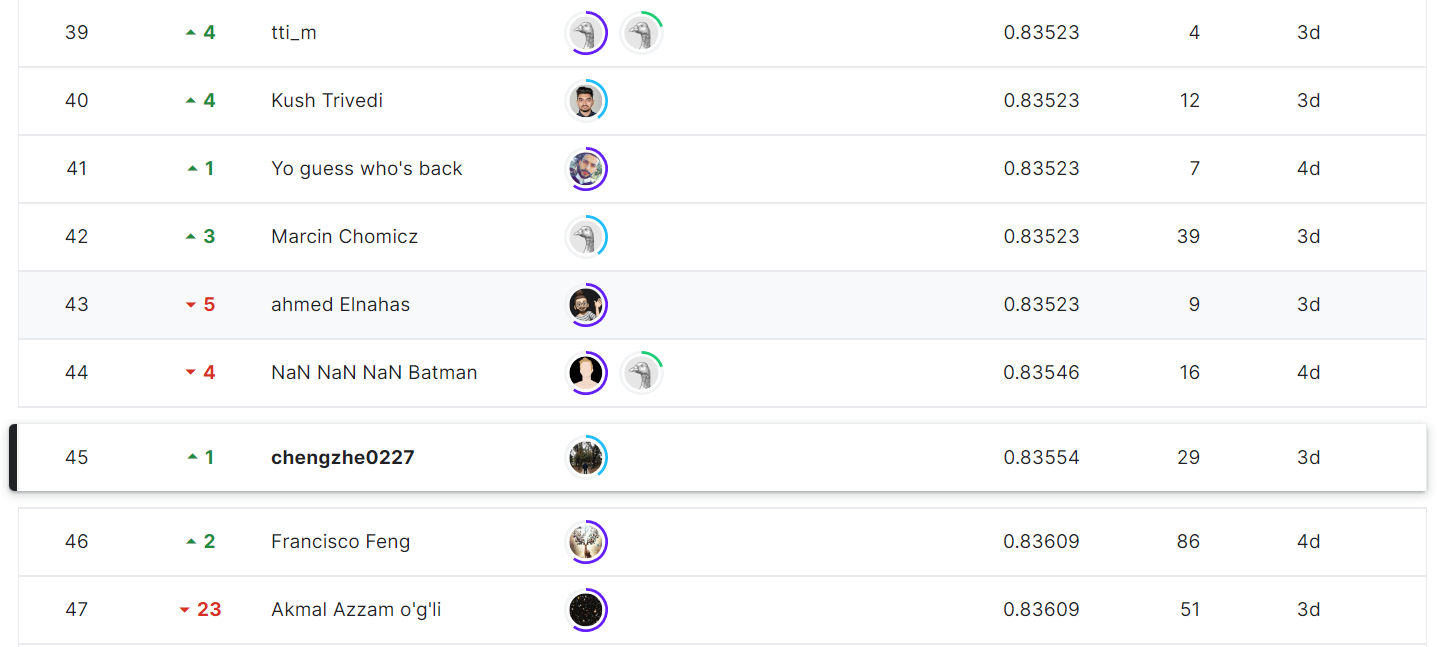